# Data as a matrix and the inverse transform

So far we have talked about the matrix as a linear machine that transforms inputs from one vector space to another. The linear transformation is just one of many interpretations of matrices. Another one is for datasets.

We often represent datasets in tabular form. Typically, this tabular form is structured so that:
- the rows correspond to different examples (sometimes also called samples, records, instances, ...)
- the columns correspond to different measurements (sometimes also called features, attributes, fields, ...)

The rows and columns can sometimes be flipped though - in biology and bioinformatics, for example, the features are in the rows. 

We have been discussing one of the triumphs of the 20th century in computation: the Singular Value Decomposition (SVD). But as you may have seen in an Excel spread sheet, the elements in a table can be any primitive data type (int, float, string, etc). We only defined the SVD when the elements are of a numeric type (specifically, floats. We did not make any constraints about the vectors to integers - why?).

In data mining and machine learning, a great deal of effort is placed into encoding non-numeric data types into numeric fields so that we can use tools such as the SVD. Typically in data mining, data scientists with the (possible) help of a domain specialist will *engineer* numeric features so that we can represent strings as floats. In machine learning on the other hand, we may want to actually develop algorithms that *learn* the features themselves instead of having to rely on humans. 


In this course we will continue to only consider *numeric* features so that we can use tools such as the SVD since that is our main aim here. 

So if we have $N$ samples from $x_{i} \in \mathbb{R}^{n}$ different floating points measurements, the data matrix would look like:

$
\begin{bmatrix} 
x_{1}^T\\
x_{2}^{T}\\
\vdots\\
x_{N}
\end{bmatrix}
$

What is the rank of this matrix? 

If we have more samples than features, so $N > n$, then the rank is at most $n$. However, if a lot of our features (for example, sensors) are very similar, then the *effective* rank will also much less than $n$. 

In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from IPython.display import display, HTML

%matplotlib inline

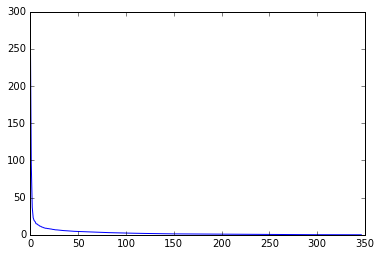

In [103]:
df = pd.read_csv("./data/trian-har.csv")

df_subject = df[df.subject == 1]

data = np.array(df_subject.iloc[:,:-2])

U, s, V = np.linalg.svd(data)
plt.plot(s);

In [104]:
data.shape

(347, 561)

In [105]:
data_projected = np.dot(V, data.T).T

In [106]:
data_projected.shape

(347, 561)

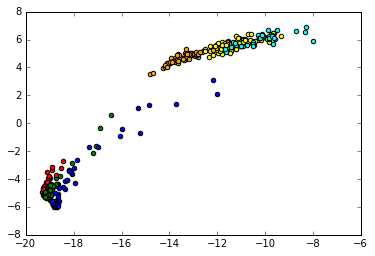

In [107]:
activity_codes = {
    "STANDING": "red", "SITTING": "green", "LAYING": "blue", "WALKING": "yellow",
    'WALKING_DOWNSTAIRS': "cyan", 'WALKING_UPSTAIRS': "orange" }

for i in range(data_projected.shape[0]):
    ax = plt.scatter(data_projected[i,0], data_projected[i,1], c = activity_codes[df_subject.Activity[i]])



But what do these singular vectors represent? Lets look at the top 1:

Note that each element of the singular vector corresponds to a *weighting* of how important each "sensor" is. 

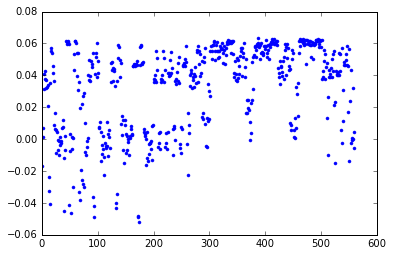

In [108]:
plt.plot(V[0,:], '.')

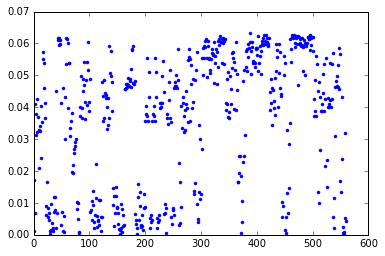

In [109]:
plt.plot(np.abs(V[0,:]), '.')

In [110]:
np.where(np.abs(V[0,:])>.062)[0].shape

(14,)

In [111]:
sparse_projection = np.dot(V[1,np.where(np.abs(V[1,:])>.1)[0]], data.T[np.where(np.abs(V[1,:])>.1)[0],:]).T

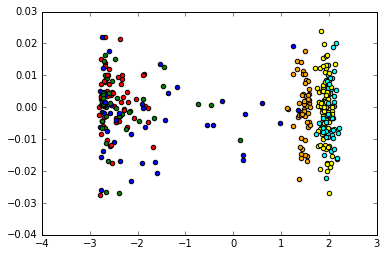

In [112]:
activity_codes = {
    "STANDING": "red", "SITTING": "green", "LAYING": "blue", "WALKING": "yellow",
    'WALKING_DOWNSTAIRS': "cyan", 'WALKING_UPSTAIRS': "orange" }

for i in range(data_projected.shape[0]):
    ax = plt.scatter(sparse_projection[i], .01*np.random.randn(), c = activity_codes[df_subject.Activity[i]])

In [113]:
data.shape

(347, 561)

In [114]:
s.shape

(347,)

# Rank of a matrix and dimension



For $A \in \mathbb{R}^{m\times n}$, we have the following properties: 

- $\text{rank}\left(A\right) \leq \min\left(m, n\right)$
    - The rank of a matrix can never be more than the number of rows/columns (the smaller of the two)
    - If $\text{rank}\left(A\right) = \min\left(m, n\right)$, then $A$ is said to be **full rank**


- $\text{rank}\left(A\right) = \text{rank}\left(A^{T}\right)$.
    - This shouldn't be a surprise given that $\text{rank}\left(A\right) \leq \min\left(m, n\right)$


- For $B \in \mathbb{R}^{n\times p}$, $\text{rank}\left(AB\right) \leq \min\left(\text{rank}\left(A\right),\text{rank}\left(B\right)\right)$.
    - Rank never increasing when you multiply matrices 
    - *Optional aside:* the overall rank is pulled down by the matrix with the lowest rank. This can give some intuition for "deep" linear neural networks.


- For $A,B \in \mathbb{R}^{m\times n}$, $\text{rank}\left(A + B\right) \leq \text{rank}\left(A\right) + \text{rank}\left(B\right)$.
    - *Optional aside:* this may give some intuition behind the deep linear "residual" neural networks




In [115]:
df = pd.read_csv("./data/sd-airbnb-listings.csv")
df["price"] = df["price"].replace( '[\$,)]','', regex=True).astype(float)

In [116]:
df.shape

(6608, 95)

In [117]:
df_mini = df[['review_scores_rating',
       u'review_scores_accuracy', u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', 'square_feet', 'price']]

df_clean= df_mini.dropna()

In [118]:
df_clean.shape

(94, 9)

In [119]:
u, s, v = np.linalg.svd(np.array(df_clean.iloc[:,:-1]))

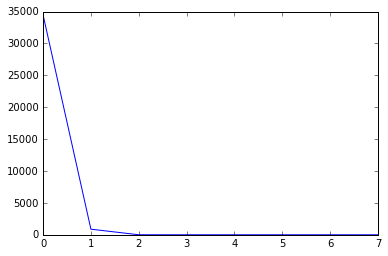

In [120]:
plt.plot(s);

Why are the singular values going down so fast? Notice that a of these columns are all reviews so they are very similar. We can measure how similar they are computing their "correlation." There are many ways of computing correlation, but for example let's compute the Pearson correlation between two review scores:

In [121]:
np.corrcoef(df_clean.review_scores_accuracy, df_clean.review_scores_rating)

array([[ 1.        ,  0.75425047],
       [ 0.75425047,  1.        ]])

Pearson correlation measuring different strengths


In [122]:
display(HTML('''<img src="./imgs/lecture-3/pearson-correlation.png" alt="Drawing" style="width: 900px;"/, align = "left">'''))

# Exercise 1


Define **condition number** of a matrix to be the ratio of the largest to smallet singular values. In this exercise we want to explore how the condition number is distributed for random IID matrices. 
1. Generate 2-by-2 matrix from IID draws from a Normal distribution with mean 0 and standard deviation 1.0 and compute the condition number.
2. Repeat step 1 for 1,000 (or more) times and display a histogram of to get a sense for how condition numbers are distributed



In [79]:
d = 100
N = 1000
cond_nums = np.zeros(N)
for i in range(N):
    A = np.random.randn(d,d)
    _,s,_ = np.linalg.svd(A)
    cond_num = s[0]/s[-1]
    cond_nums[i] = cond_num

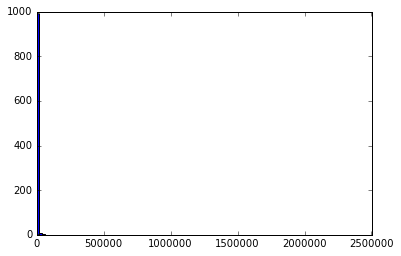

In [81]:
plt.hist(cond_nums, bins=100);

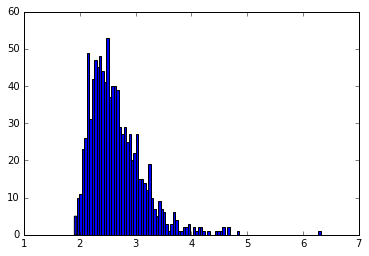

In [82]:
plt.hist(np.log10(cond_nums), bins=100);

In [83]:
10**2.5

316.22776601683796

In [84]:
np.median(cond_nums)

352.82443636775486

In [19]:
np.log10(np.median(cond_nums))

2.5753042470226766

# Exercise 2


Repeat exercise 1 but for
- 5-by-5 matrices
- 10-by-10
- 100-by-100
- *Optional:* create a boxplot for each of the cases so that you can show how the distributions vary for each case. A good resource for making visualizations in Python is: https://python-graph-gallery.com


# Exercise 3 

Repeat exercise 2 but modify each matrix generated to be duplicated horizontally. So if you generated a matrix $A \in \mathbb{R}^{n\times n}$, modify this matrix to $B = 
\begin{bmatrix}
A & A
\end{bmatrix}$

# Exercise 4 

Repeat exercise 2 for the 100-by-100 matrix but apply a smoothing function to each row for each of the matrices you generated. The smoothing function can be a simple "moving average window" filter. 


In [85]:
from scipy.linalg import toeplitz

In [88]:
d = 100
window_length = 30
first_row = np.hstack((np.ones(window_length), np.zeros(d - window_length)))

first_col = np.zeros(d)
first_col[0] = 1


moving_avg = 1./window_length * toeplitz(first_col, first_row)

In [89]:
moving_avg.shape

(100, 100)

In [90]:
moving_avg[0,:]

array([ 0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [91]:
moving_avg[1,:]

array([ 0.        ,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [92]:
moving_avg[-1,:]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [93]:
x = np.random.randn(d,1)

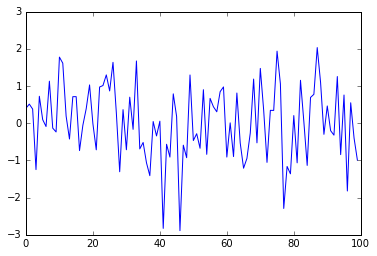

In [94]:
plt.plot(x);

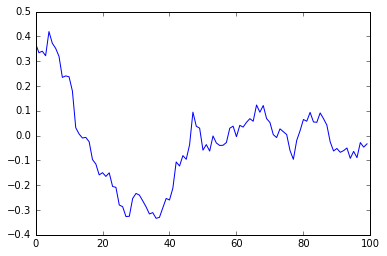

In [95]:
y = np.dot(moving_avg, x)
plt.plot(y);

## Predicting listing price

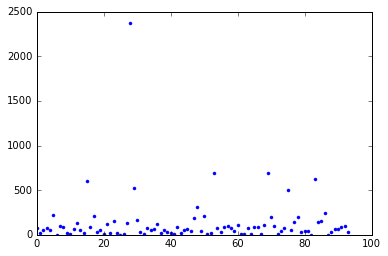

In [97]:
y = np.array(df_clean.price)
A = np.array(df_clean.iloc[:,:-1])

weights = np.dot(np.linalg.pinv(A),np.log10(y))

y_hat = np.dot(A,weights)

plt.plot(range(y_hat.shape[0]), np.abs(10**y_hat - y), '.');

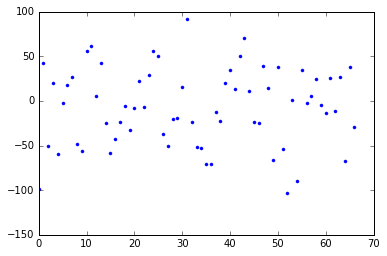

In [98]:
A_mini = A[np.abs(10**y_hat - y) < 100,:]
y_mini = y[np.abs(10**y_hat - y) < 100]
weights_mini = np.dot(np.linalg.pinv(A_mini),np.log10(y_mini))
y_hat_mini = np.dot(A_mini, weights_mini)
plt.plot(range(y_hat_mini.shape[0]), 10**y_hat_mini - y_mini, '.')


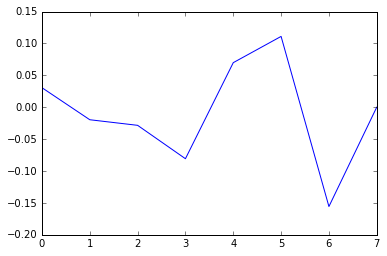

In [99]:
np.mean(10**y_hat_mini - y_mini)
plt.plot(weights_mini)

In [101]:
np.median(df_clean.price)

135.0

## Bootstrap estimation

We often would like to know what is the uncertainty when we take measurements or estimate parameters. This is because whenever we take measurement (be it using hardware such as sensors or any other method) there is *noise* or errors introduced into the process. 

The bootstrap procedure is a way to get *confidence intervals* that give you a sense of the robustness of the process.




In [123]:
display(HTML('''<img src="./imgs/lecture-3/bootstrap-sample.png" alt="Drawing" style="width: 600px;"/, align = "left">'''))

In [124]:
display(HTML('''<img src="./imgs/lecture-3/boot-600x713.png" alt="Drawing" style="width: 600px;"/, align = "left">'''))

## How many M&M's are in a jar?

A fun problem is to ask a group of people to guess the number of M&M's in a jar (without opening the jar!) to win an attractive prize. You cannot touch the jar, or weigh it, but just look at it. However, you are free to go to the store and purchase a bag of M&M's, similar looking jars, or anything else that you like.



In [128]:
display(HTML('''<img src="./imgs/lecture-3/mms.jpg" alt="Drawing" style="width: 200px;"/, align = "left">'''))

# Exercise 5

Compute the boostrapped error estimate for the AirBnB example above. 

# The determinants of a matrix

The intuition behind the determinant of a matrix is that it is a function that computes the "area of the parallelogram" constructed by the rows/columns of a square matrix. 


$det(A) = \left|A\right| = \begin{vmatrix}
a & b\\ 
c & d
\end{vmatrix} = ad - bc$



In [130]:
display(HTML('''<img src="./imgs/lecture-3/det-matrix.png" alt="Drawing" style="width: 300px;"/, align = "left">'''))

- For $A \in \mathbb{R}^{n\times n}$, $\left|A\right| = \left|A^{T}\right|$.
- For $A,B \in \mathbb{R}^{n\times n}$, $\left|AB\right| = \left|A\right|\left|B\right|$.
- For $A \in \mathbb{R}^{n\times n}$, $\left|A\right| = 0$ if and only if $A$ is singular (i.e. non-invertible). (If $A$ is singular then it does not have full rank, and hence its columns are linearly dependent. In this case, the set $S$ corresponds to a ``flat sheet'' within the $n$-dimensional space and hence has zero volume.)
- For $A \in \mathbb{R}^{n\times n}$ and $A$ non-singular, $\left|A^{-1}\right| = 1/\left|A\right|$.

# Eigenvalues and eigenvectors

Square matrices like $A \in \mathbb{R}^{n\times n}$ are very special in that they transform inputs from $x \in \mathbb{R}^{n}$ to $y \in \mathbb{R}^{n}$. 

- $y = Ax$

Of course, in general $y \neq x$. That is, the linear transformation matrix $A$ does not *preserve* the input $v$. But we may find some special inputs $v$ so that the output is just a scaled version of the input: $y = \lambda v$ where $\lambda$ is just a scalar (and not necessarily a real number). 

A (non-zero) vector $v$ of dimension $n$ is an **eigenvector** of a square ($n \times n$) matrix $A$ if it satisfies the linear equation

- $Av = \lambda v$


where $\lambda$ is a scalar, termed the **eigenvalue** corresponding to $v$. That is, the eigenvectors are the vectors that the linear transformation $A$ merely elongates or shrinks, and the amount that they elongate/shrink by is the eigenvalue. The above equation is called the **eigenvalue equation** or the eigenvalue problem.

This yields an equation for the eigenvalues

- $p\left(\lambda\right) = \det \left(A - \lambda \mathbf{I}\right) = 0$


We call $p\left(\lambda\right)$ the **characteristic polynomial**, and the equation, called the **characteristic equation**, is an $n$th order polynomial equation in the unknown $\lambda$. This equation will have $n_\lambda$ distinct solutions, where $1 \leq n_\lambda \leq n$ . The set of solutions, that is, the eigenvalues, is called the **spectrum** of $A$.



## Eigendecomposition of a matrix

Let $A$ be a square $n \times n$ matrix with n linearly independent eigenvectors, $q_i$ $( i = 1 , \ldots , n )$. Then $A$ can be factorized as

- $A = Q\Lambda Q^{-1}$




where $\mathbf{Q}$ is the square ($n \times n$) matrix whose $i^{th}$ column is the *normalized* eigenvector $q_i$ of $\mathbf{A}$ and $\mathbf{\Lambda}$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, i.e., $\Lambda_{ii}=\lambda _{i}$. 



The eigenvectors $q_{i}\,\,(i=1,\dots ,N)$ are usually normalized, but they need not be. A non-normalized set of eigenvectors, $v_{i}\,\,(i=1,\dots ,N)$, can also be used as the columns of $\mathbf{Q}$. That can be understood by noting that the magnitude of the eigenvectors in $\mathbf{Q}$ gets canceled in the decomposition by the presence of $\mathbf{Q^{−1}}$.



The decomposition can be derived from the fundamental property of eigenvectors: $\mathbf{A}\mathbf{v} =\lambda \mathbf{v}$ and thus $\mathbf{A}\mathbf {Q} =\mathbf{Q}\mathbf{\Lambda}$ which yields $\mathbf{A} =\mathbf{Q}\mathbf{\Lambda }\mathbf{Q}^{-1}$.

# Quadratic forms

For $x \in \mathbb{R}^n$ and $A \in \mathbb{R}^{n\times n}$, functions of the type $f(x) = x^{T}Ax$ are called **quadratic forms** .





In general, for a given a square matrix $A \in \mathbb{R}^{n\times n}$ and a vector $x \in \mathbb{R}^{n}$, we can write the quadratic form sa the the scalar value $x^{T}Ax$. Written explicitly, we see that

$
x^{T}Ax = \sum^{n}_{i=1}{x_{i}{\left(Ax\right)}_i} = \sum^{n}_{i=1}{x_{i}}\Bigg(\sum^{n}_{j=1}{A_{ij}x_{j}}\Bigg) = \sum^{n}_{i=1} \sum^{n}_{i=1}{A_{ij}x_{i}x_{j}}
$

Note that,
$
x^{T}Ax ={\left(x^{T}Ax\right)}^{T} = x^{T}A^{T}x = x^{T}\Bigg(\dfrac{1}{2}A + \dfrac{1}{2}A^{T}\Bigg)x
$ 


For example, for $x \in \mathbb{R}^2$ we can write:

$f(x_1, x_2) = ax_{1}^2 + (b + c)x_{1}x_{2}+ dx_{2}^2 $  



In [132]:
display(HTML('''<img src="./imgs/lecture-3/definiteness.png" alt="Drawing" style="width:600px;"/, align = "left">'''))

# The Gradient
Suppose that $f:\mathbb{R}^{m\times n} \rightarrow \mathbb{R}$ is a function that takes as input a matrix $A$ of size $m\times n$ and returns a real value. Then the **gradient** of $f$ (with respect to $A \in \mathbb{R}^{m\times n}$) is the matrix of partial derivatives, defined as:

$
\nabla_{A}f\left(A\right) \in \mathbb{R}^{m\times n} = \begin{bmatrix}
\dfrac{\partial f\left(A\right)}{\partial A_{11}} & \dfrac{\partial f\left(A\right)}{\partial A_{12}} & \cdots & \dfrac{\partial f\left(A\right)}{\partial A_{1n}}\\[10pt]
\dfrac{\partial f\left(A\right)}{\partial A_{21}} & \dfrac{\partial f\left(A\right)}{\partial A_{22}} & \cdots & \dfrac{\partial f\left(A\right)}{\partial A_{2n}}\\[10pt]
\vdots & \vdots & \ddots & \vdots\\[10pt]
\dfrac{\partial f\left(A\right)}{\partial A_{m1}} & \dfrac{\partial f\left(A\right)}{\partial A_{m2}} & \cdots & \dfrac{\partial f\left(A\right)}{\partial A_{mn}}
\end{bmatrix}
$

i.e., an $m\times n$ matrix with
$
\left(\nabla_{A}f\left(A\right)\right)_{ij} = \dfrac{\partial f\left(A\right)}{\partial A_{ij}}.
$

Note that the size of $\nabla_{A}f\left(A\right)$ is always the same as the size of $A$. 

So if, in particular, $A$ is just a vector $x \in \mathbb{R}^{n}$
$
\nabla_{x}f\left(x\right) = \begin{bmatrix} 
\dfrac{\partial f\left(x\right)}{\partial x_{1}}\\[10pt]
\dfrac{\partial f\left(x\right)}{\partial x_{2}}\\[10pt]
\vdots \\[10pt]
\dfrac{\partial f\left(x\right)}{\partial x_{n}}
\end{bmatrix}
$

# The Hessian 


Suppose that $f:\mathbb{R}^{n}\rightarrow \mathbb{R}$ is a function that takes a vector in $\mathbb{R}^{n}$ and returns a real number. The the **Hessian** matrix with respect to $x$, written $\nabla^{2}_{x}f\left(x\right)$ or simply as $H$ is the $n\times n$ matrix of partial derivatives,

$
\nabla^{2}_{x}f\left(x\right) \in \mathbb{R}^{n\times n} = \begin{bmatrix}
\dfrac{\partial^{2}f\left(x\right)}{\partial x^{2}_{1}} & \dfrac{\partial^{2}f\left(x\right)}{\partial x_{1}\partial x_{2}} & \cdots & \dfrac{\partial^{2}f\left(x\right)}{\partial x_{1}\partial x_{n}}\\[10pt]
\dfrac{\partial^{2}f\left(x\right)}{\partial x_{2}\partial x_{1}} & \dfrac{\partial^{2}f\left(x\right)}{\partial x^{2}_{2}} & \cdots & \dfrac{\partial^{2}f\left(x\right)}{\partial x_{2}\partial x_{n}}\\[10pt]
\vdots & \vdots & \ddots & \vdots \\[10pt]
\dfrac{\partial^{2}f\left(x\right)}{\partial x_{n}\partial x_{1}} & \dfrac{\partial^{2}f\left(x\right)}{\partial x_{n}\partial x_{2}} & \cdots & \dfrac{\partial^{2}f\left(x\right)}{\partial x^{2}_{n}}\\[10pt]
\end{bmatrix}
$

In other words, $\nabla^{2}_{x}f\left(x\right) \in \mathbb{R}^{n\times n}$, with

$
{\left(\nabla^{2}_{x}f\left(x\right)\right)}_{ij} = \dfrac{\partial^{2}f\left(x\right)}{\partial x_{i}\partial x_{j}}.
$

Note that the Hessian is always symmetric, since

$
\dfrac{\partial^{2}f\left(x\right)}{\partial x_{i}\partial x_{j}} = \dfrac{\partial^{2}f\left(x\right)}{\partial x_{j}\partial x_{i}}.
$


## Important Gradients and Hessians

For For $x, b \in \mathbb{R}^n$ and $A \in \mathbb{R}^{n\times n}$

- $\nabla_{x}b^{T}x = b$
- $\nabla_{x}x^{T}Ax = 2Ax$ (if $A$ symmetric)
- $\nabla^{2}_{x}x^{T}Ax = 2A$ (if $A$ symmetric)


